In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [2]:
df= pd.read_csv('/content/ILPD.csv')
df.head()
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphate', 'Alamine_Aminotransferase',
       'Asparate_Aminotransferase', 'Total_Proteins', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Is_Patient'],
      dtype='object')

In [3]:
df.shape

(583, 11)

In [4]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphate', 'Alamine_Aminotransferase',
       'Asparate_Aminotransferase', 'Total_Proteins', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Is_Patient'],
      dtype='object')

In [5]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphate,Alamine_Aminotransferase,Asparate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Is_Patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphate          583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Asparate_Aminotransferase   583 non-null    int64  
 7   Total_Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Is_Patient                  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
df.dtypes[df.dtypes == 'object']

,0
Gender,object


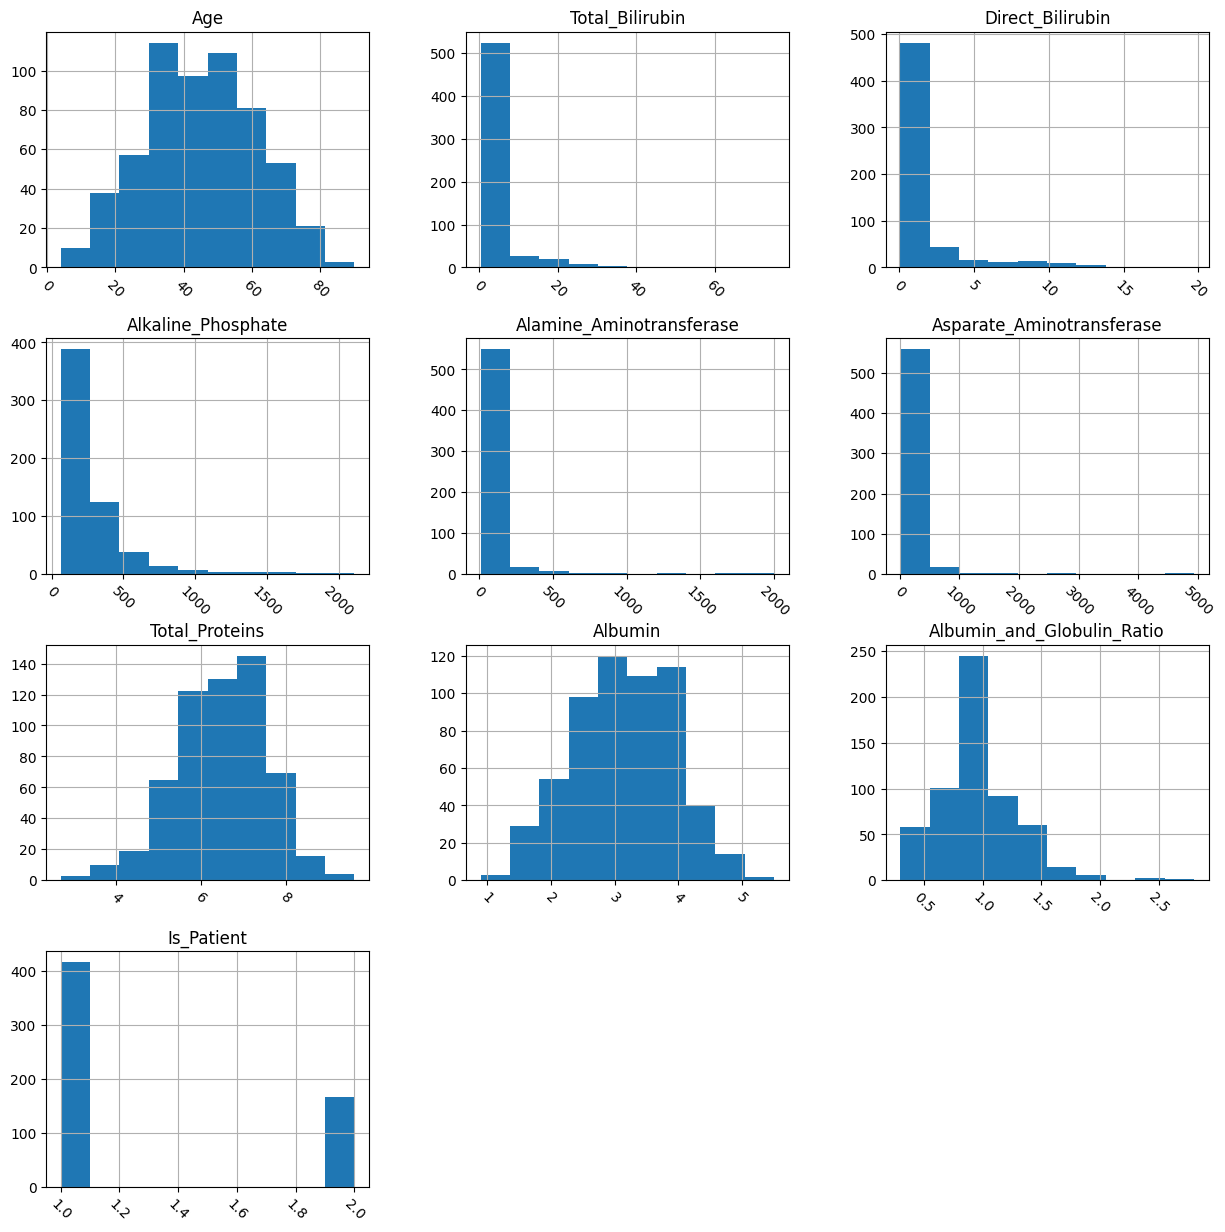

In [8]:
df.hist(figsize=(15,15), xrot=-45,bins=10)
plt.show()

In [9]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphate,Alamine_Aminotransferase,Asparate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Is_Patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [10]:
# Check if the 'Dataset' column exists in your DataFrame
if 'Dataset' in df.columns:
  def convertdataset(x):
    if x == 2:
      return 0
    return 1
  df['Dataset'] = df['Dataset'].map(convertdataset)
  df.head()
  # Investigate why the column is missing and how to fix it
  # For example, check the source data, column names, etc.

In [11]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphate,Alamine_Aminotransferase,Asparate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Is_Patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [12]:
df['Is_Patient'].value_counts()

,count
Is_Patient,
1,416
2,167


In [13]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


<Axes: xlabel='count', ylabel='Gender'>

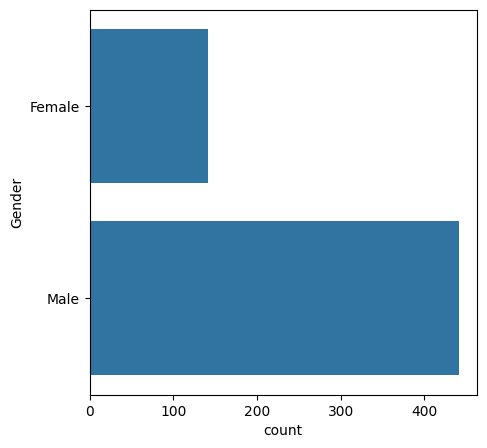

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender',data=df)

In [15]:
df[df['Gender'] == 'Male'][['Is_Patient','Gender']].head()

,Is_Patient,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


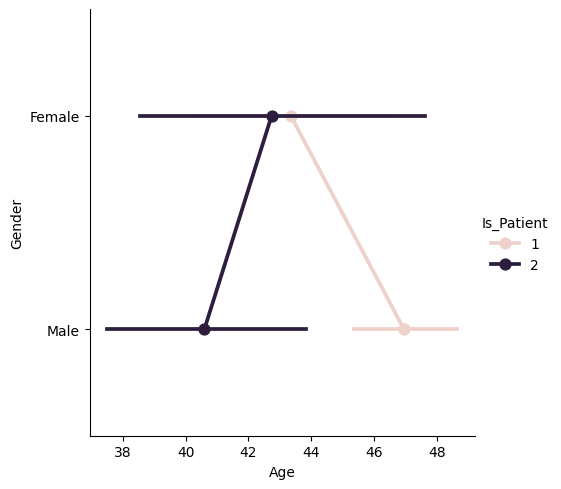

In [16]:
sns.catplot(x="Age", y="Gender", hue="Is_Patient", data=df, kind="point")  # or kind="bar", etc.
plt.show()

In [17]:
df['Gender'].value_counts()

,count
Gender,
Male,441
Female,142


In [18]:
def convertgender(x):
  if x == 'Male':
    return 0
  else:
    return 1

df['Gender'] = df['Gender'].map(convertgender)

In [19]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphate,Alamine_Aminotransferase,Asparate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Is_Patient
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [20]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphate,Alamine_Aminotransferase,Asparate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Is_Patient
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkaline_Phosphate,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Asparate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
Total_Proteins,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131


In [21]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame

# Select only numerical columns before calculating correlation
numerical_df = df.select_dtypes(include=np.number)

# Calculate correlation on the numerical subset
correlation_matrix = numerical_df.corr()

print(correlation_matrix)

                                 Age    Gender  Total_Bilirubin  \
Age                         1.000000 -0.056560         0.011763   
Gender                     -0.056560  1.000000        -0.089291   
Total_Bilirubin             0.011763 -0.089291         1.000000   
Direct_Bilirubin            0.007529 -0.100436         0.874618   
Alkaline_Phosphate          0.080425  0.027496         0.206669   
Alamine_Aminotransferase   -0.086883 -0.082332         0.214065   
Asparate_Aminotransferase  -0.019910 -0.080336         0.237831   
Total_Proteins             -0.187461  0.089121        -0.008099   
Albumin                    -0.265924  0.093799        -0.222250   
Albumin_and_Globulin_Ratio -0.216408  0.003424        -0.206267   
Is_Patient                 -0.137351  0.082416        -0.220208   

                            Direct_Bilirubin  Alkaline_Phosphate  \
Age                                 0.007529            0.080425   
Gender                             -0.100436            0.0

In [22]:
#Positive  Correlation -> one feature increses other also increses
#Negative Correlation -> one feature increases other decreases
#Closer to 0->weak relationship

                                 Age    Gender  Total_Bilirubin  \
Age                         1.000000 -0.056560         0.011763   
Gender                     -0.056560  1.000000        -0.089291   
Total_Bilirubin             0.011763 -0.089291         1.000000   
Direct_Bilirubin            0.007529 -0.100436         0.874618   
Alkaline_Phosphate          0.080425  0.027496         0.206669   
Alamine_Aminotransferase   -0.086883 -0.082332         0.214065   
Asparate_Aminotransferase  -0.019910 -0.080336         0.237831   
Total_Proteins             -0.187461  0.089121        -0.008099   
Albumin                    -0.265924  0.093799        -0.222250   
Albumin_and_Globulin_Ratio -0.216408  0.003424        -0.206267   
Is_Patient                 -0.137351  0.082416        -0.220208   

                            Direct_Bilirubin  Alkaline_Phosphate  \
Age                                 0.007529            0.080425   
Gender                             -0.100436            0.0

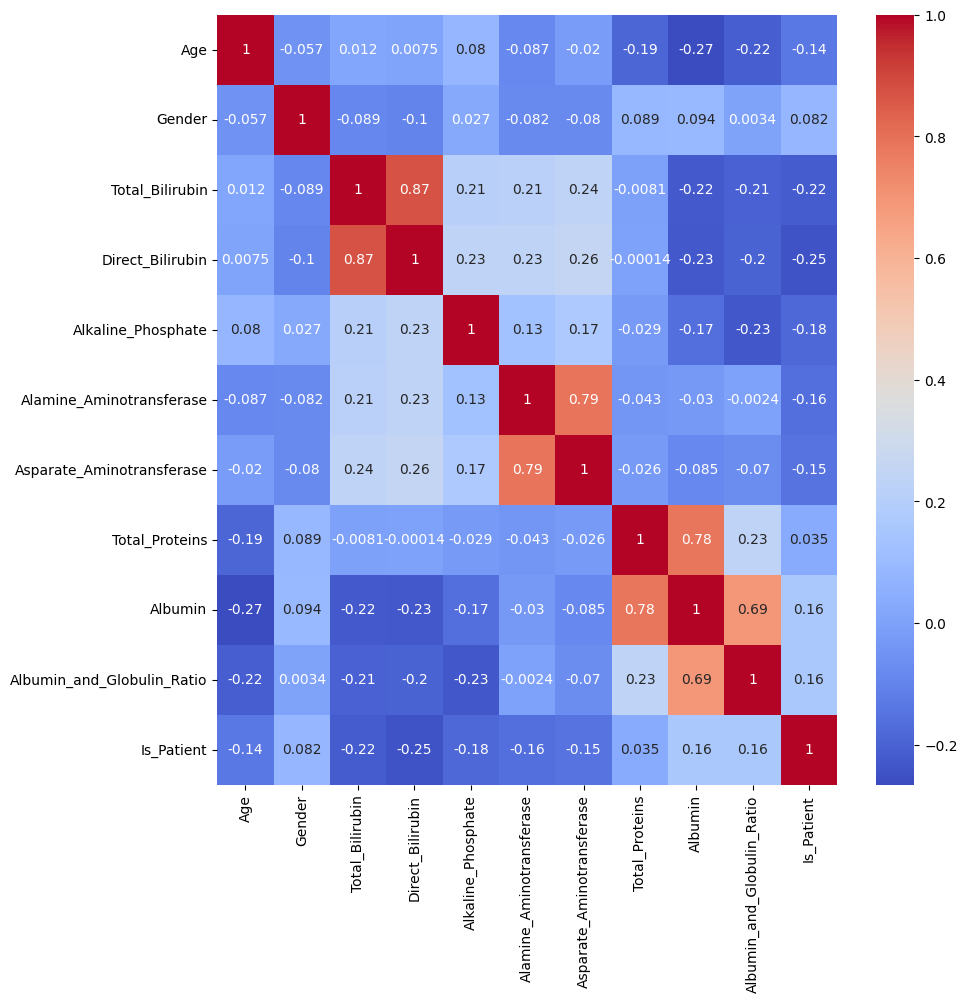

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Assuming 'df' is your DataFrame

# Select only numerical columns before calculating correlation
numerical_df = df.select_dtypes(include=np.number)

# Calculate correlation on the numerical subset
correlation_matrix = numerical_df.corr()

print(correlation_matrix)
# Select only numerical columns before calculating correlation
numerical_df = df.select_dtypes(include=np.number)

# Calculate correlation on the numerical subset
correlation_matrix = numerical_df.corr()

# Create the heatmap using the correlation matrix of numerical features
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

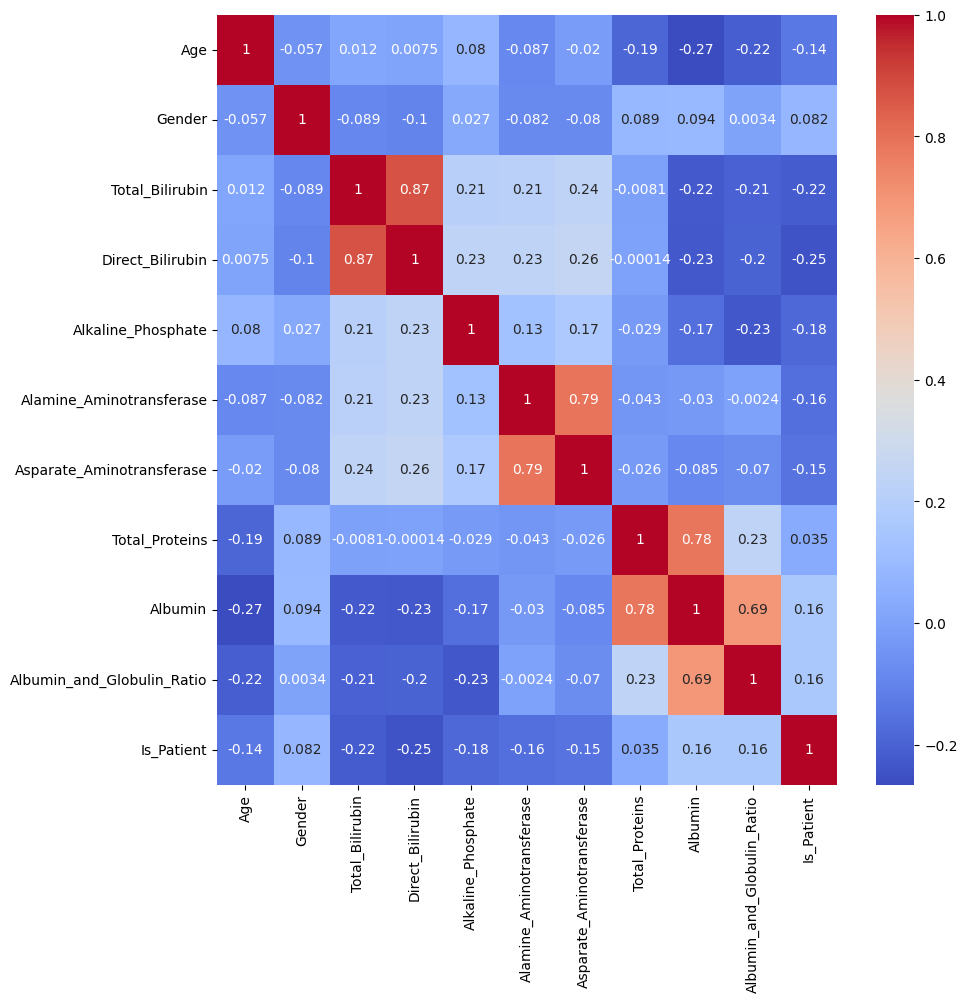

In [24]:
# Select only numerical columns before calculating correlation
numerical_df = df.select_dtypes(include=np.number)

# Calculate correlation on the numerical subset
correlation_matrix = numerical_df.corr()

# Create the heatmap using the correlation matrix of numerical features
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

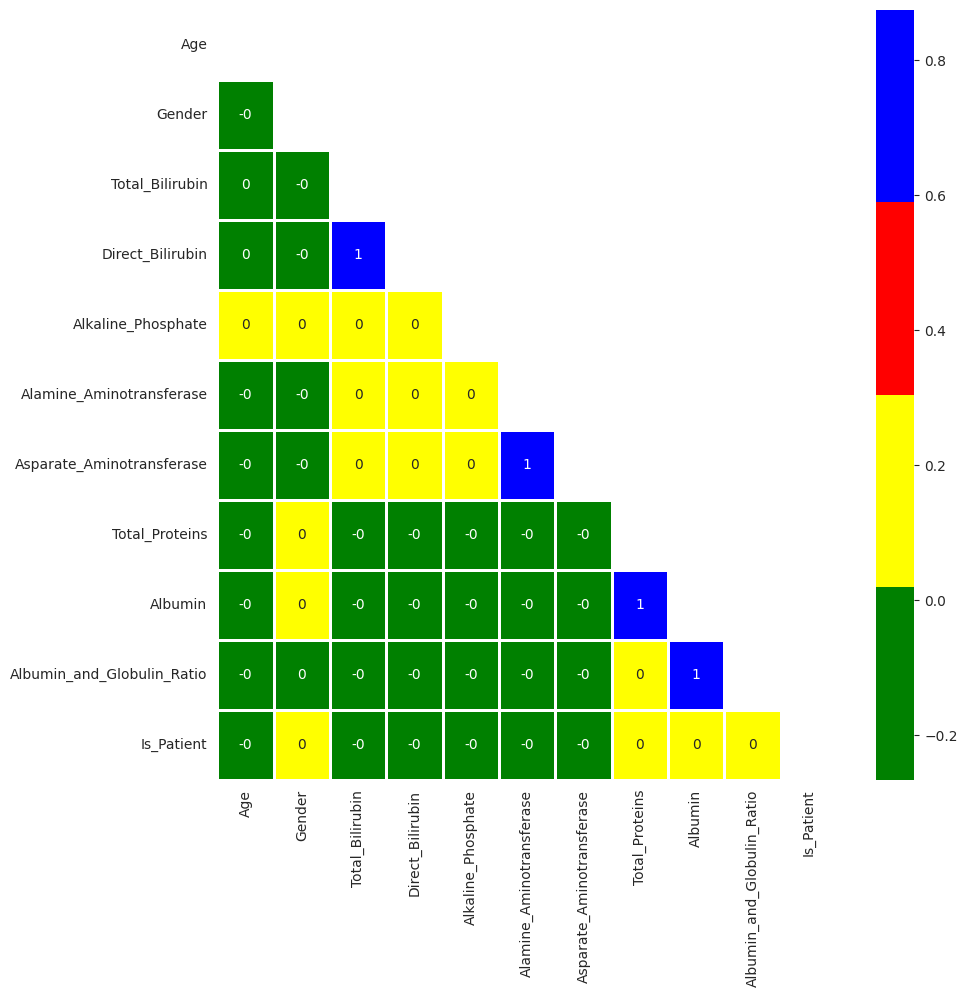

In [25]:
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
with sns.axes_style('white'):
  # Changed 'fnt' to 'fmt' to control annotation format
  ax = sns.heatmap(correlation_matrix, mask=mask, fmt=".0f", annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red', 'blue']))
plt.show()

In [26]:
df.drop_duplicates()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphate,Alamine_Aminotransferase,Asparate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Is_Patient
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [27]:
df.shape

(583, 11)

In [28]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphate', 'Alamine_Aminotransferase',
       'Asparate_Aminotransferase', 'Total_Proteins', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Is_Patient'],
      dtype='object')

<Axes: ylabel='Direct_Bilirubin'>

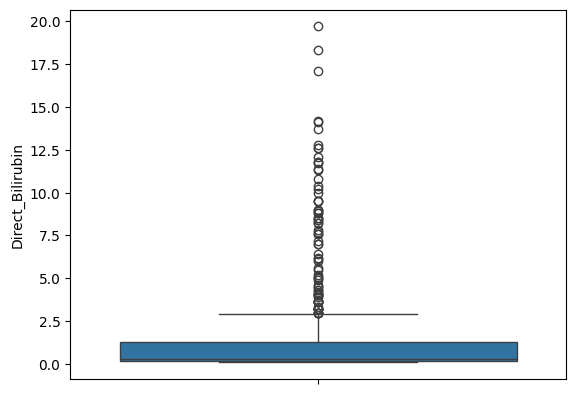

In [29]:
sns.boxplot(df.Direct_Bilirubin)

<Axes: ylabel='Alkaline_Phosphate'>

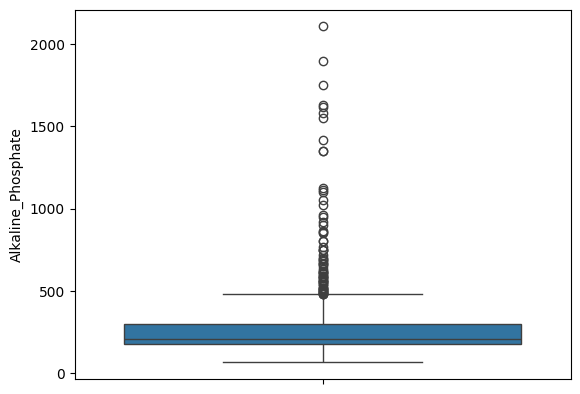

In [30]:
sns.boxplot(df.Alkaline_Phosphate)

<Axes: ylabel='Total_Bilirubin'>

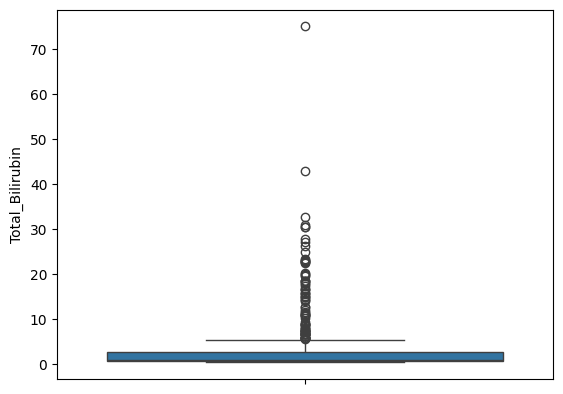

In [31]:
sns.boxplot(df.Total_Bilirubin)

In [32]:
df.Alamine_Aminotransferase.sort_values(ascending=True).head()

,Alamine_Aminotransferase
383,10
283,10
428,10
431,10
110,11


In [33]:
df.Alkaline_Phosphate.sort_values(ascending=False).head()

,Alkaline_Phosphate
233,2110
128,1896
429,1750
116,1630
77,1620


In [34]:
df=df[df.Asparate_Aminotransferase<=3000]

In [35]:
df.shape

(582, 11)

In [36]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphate,Alamine_Aminotransferase,Asparate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Is_Patient
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [37]:
df.Asparate_Aminotransferase.sort_values(ascending=False).head()

,Asparate_Aminotransferase
117,2946
118,1600
207,1500
199,1050
119,1050


In [38]:
df=df[df.Asparate_Aminotransferase<=2500]

In [39]:
df.shape

(581, 11)

In [40]:
df.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphate,0
Alamine_Aminotransferase,0
Asparate_Aminotransferase,0
Total_Proteins,0
Albumin,0
Albumin_and_Globulin_Ratio,4


In [41]:
df=df.dropna(how='any')

In [42]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphate,Alamine_Aminotransferase,Asparate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Is_Patient
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [43]:
df.shape

(577, 11)

In [44]:
#Machine learning Model
#Data Preparation
Dataset = df
# Assuming 'Dataset' is your target variable column
y = df['Gender']
X = df.drop(columns=['Gender'], axis=1)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [46]:
train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

[     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphate  \
 216   55              0.9               0.2                 116   
 178   75             10.6               5.0                 562   
 192   60              2.3               0.6                 272   
 230   61              1.5               0.6                 196   
 365   40              0.7               0.2                 176   
 ..   ...              ...               ...                 ...   
 106   36              5.3               2.3                 145   
 336   75              6.7               3.6                 458   
 425   58              0.4               0.1                 100   
 423   53              1.6               0.9                 178   
 482   45              1.1               0.4                  92   
 
      Alamine_Aminotransferase  Asparate_Aminotransferase  Total_Proteins  \
 216                        36                         16             6.2   
 178                        

In [47]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

In [48]:
#DAta Standardization
train_mean = X_train.mean()
train_std = X_train.std()

In [49]:
X_train = (X_train - train_mean) / train_std

In [50]:
X_train.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphate,Alamine_Aminotransferase,Asparate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Is_Patient
count,4.610000e+02,4.610000e+02,4.610000e+02,4.610000e+02,4.610000e+02,4.610000e+02,4.610000e+02,4.610000e+02,4.610000e+02,4.610000e+02
mean,1.425709e-16,-5.779903e-17,-2.311961e-17,-3.564273e-17,2.889951e-17,9.633172e-18,1.603923e-16,-2.552790e-16,1.252312e-17,-3.853269e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.537724e+00,-4.618972e-01,-4.950063e-01,-8.899168e-01,-4.237230e-01,-5.284270e-01,-3.463555e+00,-2.806100e+00,-1.988729e+00,-6.159665e-01
25%,-7.486171e-01,-3.996993e-01,-4.595938e-01,-4.929675e-01,-3.289670e-01,-4.376471e-01,-7.148911e-01,-6.753563e-01,-7.324553e-01,-6.159665e-01
50%,-8.297151e-03,-3.686003e-01,-4.241813e-01,-3.486223e-01,-2.594793e-01,-3.287112e-01,1.808593e-02,-4.866698e-02,-1.502796e-01,-6.159665e-01
75%,7.937162e-01,-1.198086e-01,-7.005675e-02,5.734865e-02,-9.523559e-02,-5.637150e-02,6.594408e-01,8.286981e-01,4.625369e-01,1.619943e+00
max,2.767903e+00,1.113802e+01,6.445836e+00,7.256566e+00,1.012578e+01,8.489043e+00,2.858372e+00,2.959442e+00,5.671477e+00,1.619943e+00


In [51]:
X_test = (X_test - train_mean) / train_std
X_test.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphate,Alamine_Aminotransferase,Asparate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Is_Patient
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,-0.112538,-0.065922,-0.033423,0.063493,-0.040887,-0.004982,0.008608,0.004277,-0.027716,0.116487
std,1.001685,0.823229,0.977916,1.393934,0.985580,1.215579,0.978360,0.987624,0.890296,1.053939
min,-2.414337,-0.430798,-0.495006,-1.011708,-0.423723,-0.516323,-3.371933,-2.806100,-1.988729,-0.615966
25%,-0.810310,-0.415249,-0.459594,-0.531309,-0.354235,-0.440673,-0.531647,-0.550018,-0.763096,-0.615966
50%,-0.193377,-0.384150,-0.424181,-0.416284,-0.297382,-0.377127,0.109708,0.014002,0.156129,-0.615966
75%,0.608636,-0.209218,-0.096616,-0.023846,-0.180516,-0.141099,0.567819,0.609357,0.477857,1.619943
max,1.842503,4.218497,4.498151,8.221875,8.041145,9.094243,2.217017,2.332752,2.300986,1.619943


In [52]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = lr.predict(X_test)

In [54]:
print(accuracy_score(y_train, lr.predict(X_train)))
lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(lr_acc)
print(confusion_matrix(y_test,lr.predict(X_test)))
print(classification_report(y_test,lr.predict(X_test)))

0.7570498915401301
0.7586206896551724
[[88  0]
 [28  0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        88
           1       0.00      0.00      0.00        28

    accuracy                           0.76       116
   macro avg       0.38      0.50      0.43       116
weighted avg       0.58      0.76      0.65       116



In [55]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [56]:
knn.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [57]:
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)
print(confusion_matrix(y_test,knn.predict(X_test)))
print(classification_report(y_test,knn.predict(X_test)))

0.7830802603036876
0.6724137931034483
[[76 12]
 [26  2]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        88
           1       0.14      0.07      0.10        28

    accuracy                           0.67       116
   macro avg       0.44      0.47      0.45       116
weighted avg       0.60      0.67      0.63       116



In [58]:
svc = SVC(probability = True)
parameters = {
    'gamma' :[0.0001,0.001,0.01,0.1],
    'C':[0.01,0.05,0.5,0.1,1,10,15,20,30]
}
grid_search = GridSearchCV(svc, parameters, cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20, 30],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [59]:
grid_search.best_params_

{'C': 0.01, 'gamma': 0.0001}

In [60]:
grid_search.best_score_

np.float64(0.757059373539037)

In [61]:
svc = SVC(C=0.01,gamma=0.0001,probability = True)
svc.fit(X_train,y_train)


SVC(C=0.01, gamma=0.0001, probability=True)

In [62]:
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)
print(confusion_matrix(y_test,svc.predict(X_test)))
print(classification_report(y_test,svc.predict(X_test)))

0.7570498915401301
0.7586206896551724
[[88  0]
 [28  0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        88
           1       0.00      0.00      0.00        28

    accuracy                           0.76       116
   macro avg       0.38      0.50      0.43       116
weighted avg       0.58      0.76      0.65       116



In [63]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [64]:
print(accuracy_score(y_train, dtc.predict(X_train)))
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)
print(confusion_matrix(y_test,dtc.predict(X_test)))
print(classification_report(y_test,dtc.predict(X_test)))

1.0
0.7155172413793104
[[69 19]
 [14 14]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        88
           1       0.42      0.50      0.46        28

    accuracy                           0.72       116
   macro avg       0.63      0.64      0.63       116
weighted avg       0.73      0.72      0.72       116



In [65]:
grid_parameter = {
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,10,12,15],
    'splitter':['best','random'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['auto','sqrt','log2']
}
grid_search_dt = GridSearchCV(dtc, grid_parameter, cv=24, n_jobs=-1,verbose=1)
grid_search_dt.fit(X_train,y_train)

Fitting 24 folds for each of 1800 candidates, totalling 43200 fits


GridSearchCV(cv=24, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 12, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [66]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [67]:
grid_search_dt.best_score_

np.float64(0.7725877192982455)

In [68]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='sqrt',min_samples_leaf=7,min_samples_split=3,splitter='best')
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_leaf=7, min_samples_split=3)

In [69]:
print(accuracy_score(y_train, dtc.predict(X_train)))
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)
print(confusion_matrix(y_test,dtc.predict(X_test)))
print(classification_report(y_test,dtc.predict(X_test)))

0.7939262472885033
0.7672413793103449
[[81  7]
 [20  8]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        88
           1       0.53      0.29      0.37        28

    accuracy                           0.77       116
   macro avg       0.67      0.60      0.61       116
weighted avg       0.74      0.77      0.74       116



In [70]:
#Random Forest
rand_clf=RandomForestClassifier(criterion='entropy',max_depth=15,max_features=0.75,min_samples_leaf=7,min_samples_split=3,n_estimators=130)
rand_clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=7, min_samples_split=3,
                       n_estimators=130)

0.8698481561822126
0.75
[[81  7]
 [22  6]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        88
           1       0.46      0.21      0.29        28

    accuracy                           0.75       116
   macro avg       0.62      0.57      0.57       116
weighted avg       0.71      0.75      0.71       116



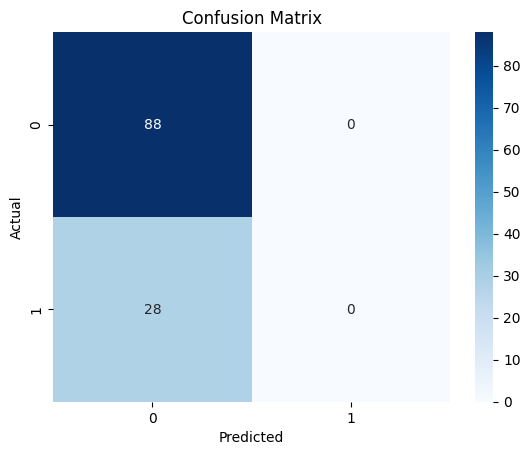

In [71]:
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_clf_acc = accuracy_score(y_test,rand_clf.predict(X_test))
print(rand_clf_acc)
print(confusion_matrix(y_test,rand_clf.predict(X_test)))
print(classification_report(y_test,rand_clf.predict(X_test)))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

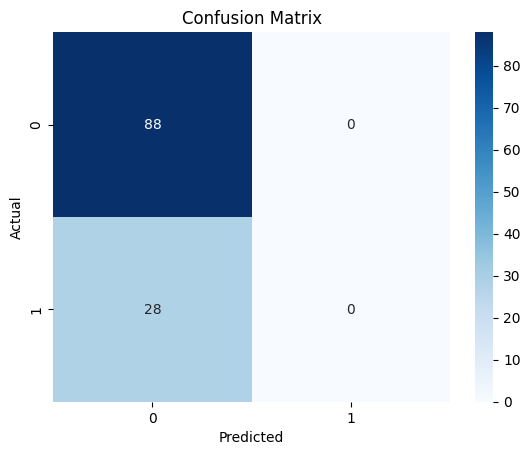

In [72]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [73]:
#Gradient Boosting  Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
parameters ={
    'loss':['deviance','exponential'],
    'learning_rate':[0.001,0.01,0.1,1,10],
    'n_estimators':[100,150,180,200]
}
grid_search_gbc = GridSearchCV(gbc, parameters, cv=20,n_jobs=-1,verbose=1)
grid_search_gbc.fit(X_train,y_train)

Fitting 20 folds for each of 40 candidates, totalling 800 fits


GridSearchCV(cv=20, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [74]:
grid_search_gbc.best_params_

{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 150}

In [75]:
grid_search_gbc.best_score_

np.float64(0.7721920289855073)

In [76]:
gbc = GradientBoostingClassifier(learning_rate=0.001,loss='exponential',n_estimators=100)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.001, loss='exponential')

In [77]:
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test,gbc.predict(X_test))
print(gbc_acc)
print(confusion_matrix(y_test,gbc.predict(X_test)))
print(classification_report(y_test,gbc.predict(X_test)))

0.7570498915401301
0.7586206896551724
[[88  0]
 [28  0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        88
           1       0.00      0.00      0.00        28

    accuracy                           0.76       116
   macro avg       0.38      0.50      0.43       116
weighted avg       0.58      0.76      0.65       116



In [78]:
#XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic',learning_rate = 0.001 ,max_depth=100,n_estimators=300)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.001, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=100,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [79]:
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(xgb_acc)
print(confusion_matrix(y_test,xgb.predict(X_test)))
print(classification_report(y_test,xgb.predict(X_test)))

0.7570498915401301
0.7586206896551724
[[88  0]
 [28  0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        88
           1       0.00      0.00      0.00        28

    accuracy                           0.76       116
   macro avg       0.38      0.50      0.43       116
weighted avg       0.58      0.76      0.65       116



In [80]:
#Model Comparision
models =pd.DataFrame({
    'Model':['Logistic Regression','KNN','SVC','Decision Tree','Random Forest','Gradient Boosting','XGBoost'],
    'Score':[100*round(lr_acc,4),100*round(knn_acc,4),100*round(svc_acc,4),100*round(dtc_acc,4),100*round(rand_clf_acc,4),100*round(gbc_acc,4),100*round(xgb_acc,4)]
})
models.sort_values(by='Score',ascending=False)

,Model,Score
3,Decision Tree,76.72
2,SVC,75.86
0,Logistic Regression,75.86
6,XGBoost,75.86
5,Gradient Boosting,75.86
4,Random Forest,75.00
1,KNN,67.24


In [81]:
import pickle
model =lr_acc
pickle.dump(model,open("liver.pkl","wb"))

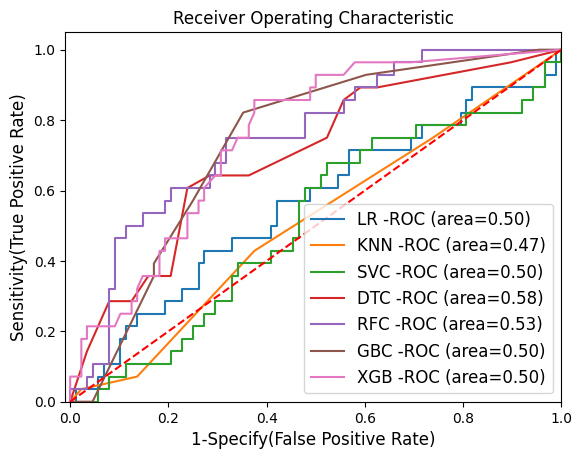

In [82]:
#85%
#ANN
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
models=[
    {
        'label':'LR',
        'model':lr,},
    {
        'label':'KNN',
        'model':knn,},
    {
        'label':'SVC',
        'model':svc,},
    {
        'label':'DTC',
        'model':dtc,
        },
    {
        'label':'RFC',
        'model':rand_clf,
    },
    {
        'label':'GBC',
        'model':gbc,
    },
    {
        'label':'XGB',
        'model':xgb,
    }
]
for m in models:
  model=m['model']
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  fpr1,tpr1,threshold1=roc_curve(y_test,model.predict_proba(X_test)[:,1])
  auc=metrics.roc_auc_score(y_test,model.predict(X_test))
  plt.plot(fpr1,tpr1,label='%s -ROC (area=%0.2f)'%(m['label'],auc))
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.01,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Specify(False Positive Rate)',fontsize=12)
plt.ylabel('Sensitivity(True Positive Rate)',fontsize=12)
plt.title('Receiver Operating Characteristic',fontsize=12)
plt.legend(loc='lower right',fontsize=12)
plt.savefig("roc_liver.jpeg",format='jpeg',dpi=400,bbox_inches='tight')
plt.show()

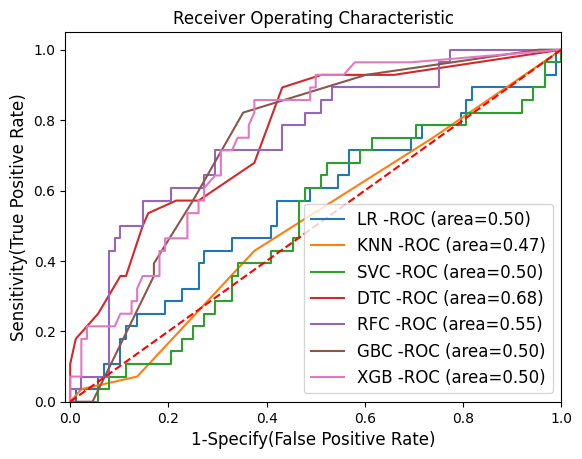

In [83]:
import pickle
model =lr_acc
pickle.dump(model,open("liver.pkl","wb"))

#85%
#ANN
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
models=[
    {
        'label':'LR',
        'model':lr,},
    {
        'label':'KNN',
        'model':knn,},
    {
        'label':'SVC',
        'model':svc,},
    {
        'label':'DTC',
        'model':dtc,
        },
    {
        'label':'RFC',
        'model':rand_clf,
    },
    {
        'label':'GBC',
        'model':gbc,
    },
    {
        'label':'XGB',
        'model':xgb,
    }
]
for m in models:
  model=m['model']
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  fpr1,tpr1,threshold1=roc_curve(y_test,model.predict_proba(X_test)[:,1])
  auc=metrics.roc_auc_score(y_test,model.predict(X_test))
  plt.plot(fpr1,tpr1,label='%s -ROC (area=%0.2f)'%(m['label'],auc))
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.01,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Specify(False Positive Rate)',fontsize=12)
plt.ylabel('Sensitivity(True Positive Rate)',fontsize=12)
plt.title('Receiver Operating Characteristic',fontsize=12)
plt.legend(loc='lower right',fontsize=12)
#The function name to save the plot is savefig not saveflg
plt.savefig("roc_liver.jpeg",format='jpeg',dpi=400,bbox_inches='tight')
plt.show()

[75.86, 67.24, 75.86, 76.72, 75.0, 75.86, 75.86]
[np.float64(50.0), np.float64(46.75), np.float64(50.0), np.float64(53.169999999999995), np.float64(58.52), np.float64(50.0), np.float64(50.0)]


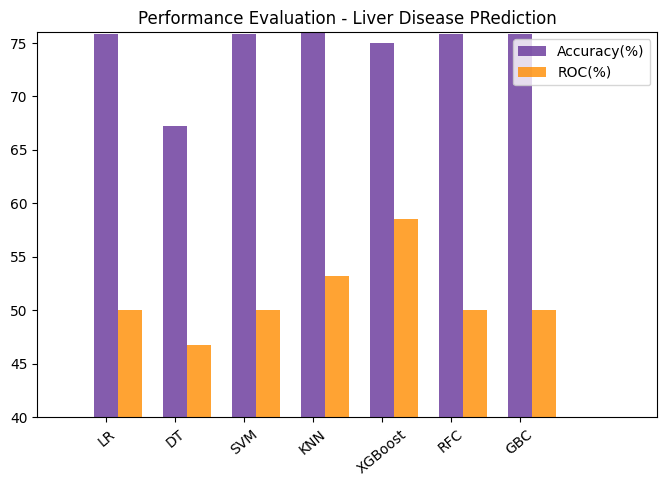

In [84]:
from sklearn.metrics import roc_curve
models=[
    {
        'label':'LR',
        'model':lr,},
    {
        'label':'KNN',
        'model':knn,},
    {
        'label':'SVC',
        'model':svc,},
    {
        'label':'DTC',
        'model':dtc,
        },
    {
        'label':'RFC',
        'model':rand_clf,
    },
    {
        'label':'GBC',
        'model':gbc,
    },
    {
        'label':'XGB',
        'model':xgb,
    }
]
means_roc=[]
means_accuracy = [100*round(lr_acc,4),100*round(knn_acc,4),100*round(svc_acc,4),100*round(dtc_acc,4),100*round(rand_clf_acc,4),100*round(gbc_acc,4),100*round(xgb_acc,4)]
for m in models:
  model=m['model']
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  fpr1,tpr1,threshold1=roc_curve(y_test,model.predict_proba(X_test)[:,1])
  auc=metrics.roc_auc_score(y_test,model.predict(X_test))
  auc=100*round(auc,4)
  means_roc.append(auc)
print(means_accuracy)
print(means_roc)
#data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

#create plot
fig,a =plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width =0.35
opacity =0.8
error_config = {'ecolor':'0.3'}

rects1 =plt.bar(index,means_accuracy,bar_width,
                alpha = opacity,
                color='rebeccapurple',
                label ='Accuracy(%)')
rects2 =plt.bar(index+bar_width,means_roc,bar_width,
                alpha = opacity,
                color='darkorange',
                label ='ROC(%)')

plt.xlim([-1,8])
plt.ylim([40,76])

plt.title('Performance Evaluation - Liver Disease PRediction',fontsize=12 )
plt.xticks(index,('LR','DT','SVM','KNN','XGBoost','RFC','GBC'), rotation=40)
plt.legend(loc="upper right",fontsize=10)
plt.savefig("PE_liver.jpeg",format='jpeg',dpi=400,bbox_inches='tight')
plt.show()

In [85]:
# Install necessary libraries (only once)
!pip install ipywidgets

import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import joblib  # or pickle

# Assuming the model is trained and saved as 'liver_model.pkl'
# Uncomment this if model is saved separately
# model = joblib.load("liver_model.pkl")

# If the model is already trained in the notebook, use that model variable
# Example:
# from xgboost import XGBClassifier
# model = XGBClassifier()
# model.fit(X_train, y_train)  # already done before

# --- Define Input Widgets ---
age = widgets.IntSlider(description="Age", min=4, max=100, value=45)
gender = widgets.Dropdown(description="Gender", options=["Male", "Female"])
total_bilirubin = widgets.FloatText(description="Total Bilirubin")
direct_bilirubin = widgets.FloatText(description="Direct Bilirubin")
alk_phosphate = widgets.IntText(description="Alk. Phosphotase")
alamine_aminotransferase = widgets.IntText(description="Alamine Aminotransferase")
aspartate_aminotransferase = widgets.IntText(description="Aspartate Aminotransferase")
total_proteins = widgets.FloatText(description="Total Proteins")
albumin = widgets.FloatText(description="Albumin")
albumin_globulin_ratio = widgets.FloatText(description="A/G Ratio")

predict_btn = widgets.Button(description="Predict")

# --- Define Prediction Function ---
def on_predict_clicked(b):
    # Convert gender
    gender_val = 1 if gender.value == "Male" else 0

    # Create input array
    input_data = np.array([[
        age.value,
        gender_val,
        total_bilirubin.value,
        direct_bilirubin.value,
        alk_phosphate.value,
        alamine_aminotransferase.value,
        aspartate_aminotransferase.value,
        total_proteins.value,
        albumin.value,
        albumin_globulin_ratio.value
    ]])

    try:
        # Use the trained XGBoost model for prediction
        prediction = xgb.predict(input_data)
        result = "No Liver Disease" if prediction[0] == 1 else " Liver Disease Detected"
        print("✅ Prediction:", result)
    except Exception as e:
        print("⚠️ Error during prediction:", e)

predict_btn.on_click(on_predict_clicked)

# --- Display Widgets ---
display(age, gender, total_bilirubin, direct_bilirubin,
        alk_phosphate, alamine_aminotransferase,
        aspartate_aminotransferase, total_proteins,
        albumin, albumin_globulin_ratio, predict_btn)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.9 MB/s eta 0:00:00


IntSlider(value=45, description='Age', min=4)

Dropdown(description='Gender', options=('Male', 'Female'), value='Male')

FloatText(value=0.0, description='Total Bilirubin')

FloatText(value=0.0, description='Direct Bilirubin')

IntText(value=0, description='Alk. Phosphotase')

IntText(value=0, description='Alamine Aminotransferase')

IntText(value=0, description='Aspartate Aminotransferase')

FloatText(value=0.0, description='Total Proteins')

FloatText(value=0.0, description='Albumin')

FloatText(value=0.0, description='A/G Ratio')

Button(description='Predict', style=ButtonStyle())

✅ Prediction:  Liver Disease Detected
